In [1]:
# Cell 1: Imports
from ultralytics import YOLO
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [11]:
# Cell 2: Load pre-trained YOLOv11

# download 3 models to do comparison
# Downloads automatically first time to models folder
model_n = YOLO('../models/yolo11n.pt')
model_m = YOLO('../models/yolo11m.pt')
model_x = YOLO('../models/yolo11x.pt')

print("Model loaded successfully!")
print(f"Device: {model.device}")  # Should show 'mps' for M4 Pro

Model loaded successfully!
Device: cpu


In [35]:
# Cell 3: Test on sample image
# Option A: Use a URL
# img_url = "https://ultralytics.com/images/zidane.jpg"

# Option B: Use local image
img_path = "../data/twopersons.HEIC"
# img_path = "../data/sandwich.jpg"

# results = model_n(img_path)
results = model_x(img_path)


image 1/1 /Users/jasonzhang/workspace/rmcs5112/notebooks/../data/twopersons.HEIC: 480x640 2 persons, 1 backpack, 161.9ms
Speed: 1.3ms preprocess, 161.9ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


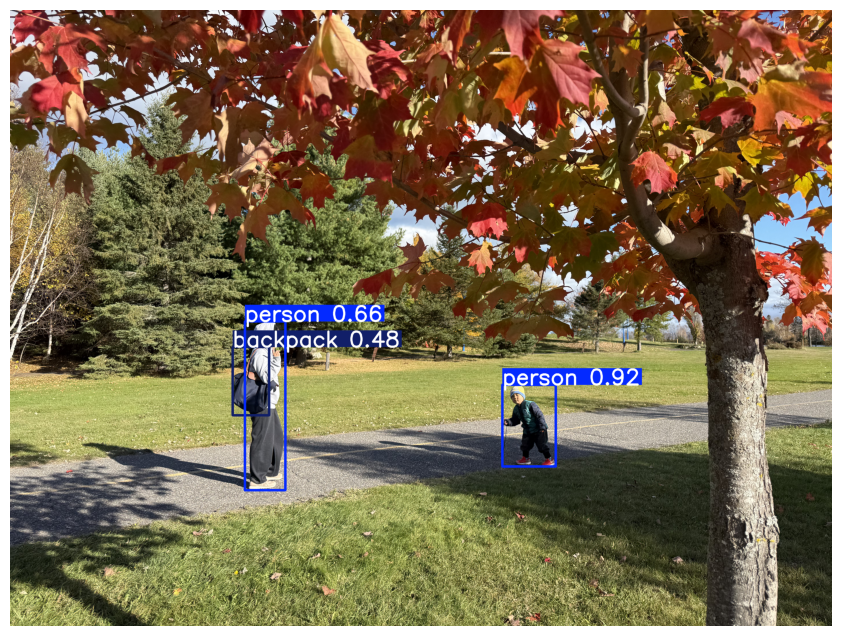

In [36]:
# Cell 4: Visualize results
result = results[0]
result.show()  # Opens in window

# Or plot in notebook
img_with_boxes = result.plot()
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [37]:
# Cell 5: Check detected classes
for box in result.boxes:
    class_id = int(box.cls[0])
    class_name = result.names[class_id]
    confidence = float(box.conf[0])
    print(f"Detected: {class_name} (confidence: {confidence:.2f})")

Detected: person (confidence: 0.92)
Detected: person (confidence: 0.66)
Detected: backpack (confidence: 0.48)
